##**About Walmart**
**Walmart** is an American multinational retail corporation that operates a chain of
supercenters, discount departmental stores, and grocery stores in the **United States**.
Walmart has more than **100 million customers** worldwide.

## **Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchasing habits (specifically, purchase amount) against the customer's gender ,age and the various key basics to help the business make better decisions.

They want to understand if the spending habits differ between male and
female or for different age groups and get answer for questions like Do women spend more on Black Friday

Assumption: 50 million customers are male and 50 million are female.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown 1A-K2jjZJqpobB8acDdSRtapaX7sR_1p3

Downloading...
From: https://drive.google.com/uc?id=1A-K2jjZJqpobB8acDdSRtapaX7sR_1p3
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 211MB/s]


In [ ]:
df=pd.read_csv("walmart_data.csv")

## **Basic Analysis**

In [ ]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Description of data and Sanity check:

In [ ]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
df.User_ID.nunique()

5891

In [ ]:
df.User_ID.value_counts(ascending=False)[:20]

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
1002909     718
1001449     714
1002063     709
1004344     705
1003391     698
1003841     698
1000424     694
1004510     691
1001980     685
1001088     680
Name: User_ID, dtype: int64

In [ ]:
df.Product_ID.nunique()

3631

In [ ]:
np.unique(df.Gender,return_counts=True)

(array(['F', 'M'], dtype=object), array([135809, 414259]))

In [ ]:
np.unique(df.Age,return_counts=True)

(array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
       dtype=object),
 array([ 15102,  99660, 219587, 110013,  45701,  38501,  21504]))

In [ ]:
np.unique(df.Occupation,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([69638, 47426, 26588, 17650, 72308, 12177, 20355, 59133,  1546,
         6291, 12930, 11586, 31179,  7728, 27309, 12165, 25371, 40043,
         6622,  8461, 33562]))

In [ ]:
np.unique(df.City_Category,return_counts=True)

(array(['A', 'B', 'C'], dtype=object), array([147720, 231173, 171175]))

In [ ]:
np.unique(df.Stay_In_Current_City_Years,return_counts=True)

(array(['0', '1', '2', '3', '4+'], dtype=object),
 array([ 74398, 193821, 101838,  95285,  84726]))

In [ ]:
np.unique(df.Marital_Status,return_counts=True)

(array([0, 1]), array([324731, 225337]))

In [ ]:
np.unique(df.Product_Category,return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([140378,  23864,  20213,  11753, 150933,  20466,   3721, 113925,
           410,   5125,  24287,   3947,   5549,   1523,   6290,   9828,
           578,   3125,   1603,   2550]))

In [ ]:
df.Purchase.min(),df.Purchase.max()

(12, 23961)

**Null values and duplicate detection:**

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
np.any(df.duplicated())

False

* Dataset has 550068 entries(rows). Every entry has 10 values (columns) associated with it.
* All entries seems to be rational.
* Even though Maritial Status and Product Category are of int datatype,they are categorical values.
 * "0" as Maritial Status means person is single and "1" represent Married.

* There are no null values or duplicated rows.
* There are 5891 unique User_ID  indicating 5891 unique customers. **User_ID 1001680** is most visiting customer with over 1000 visits(transcations) to Store.
* Store has over 3600 products categorized under 20 categories.
* There are 3 City categories (A,B and C).
* Age is categorized in 7 bins ('0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+').
* Population's Occupation is categoried in 20 different categories.


## Univariate Analysis:

In [ ]:
gender=df.Gender.value_counts(normalize=True)* 100
gender

M    75.310507
F    24.689493
Name: Gender, dtype: float64

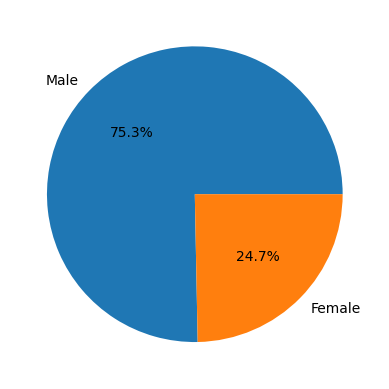

In [ ]:
plt.pie(gender,labels=["Male","Female"],normalize=True,autopct= '%1.1f%%')
plt.show()

In [ ]:
df.Age.value_counts(normalize=True) * 100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='count'>

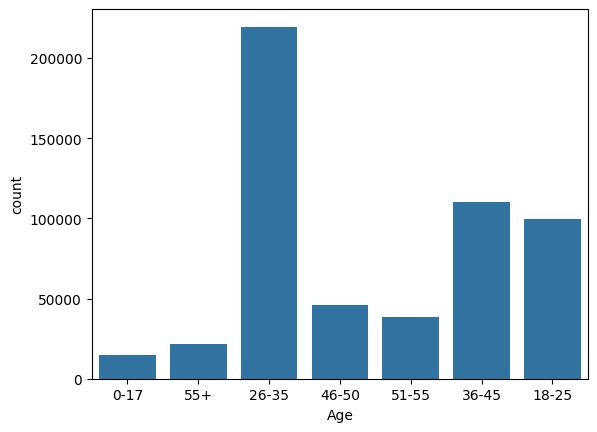

In [ ]:
sns.countplot(data=df, x="Age")

In [ ]:
Top_5_Occupation=(df.Occupation.value_counts(normalize=True))[:5]
Top_5_Occupation * 100

4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
Name: Occupation, dtype: float64

Text(0, 0.5, 'Times of Purchase made in percent ')

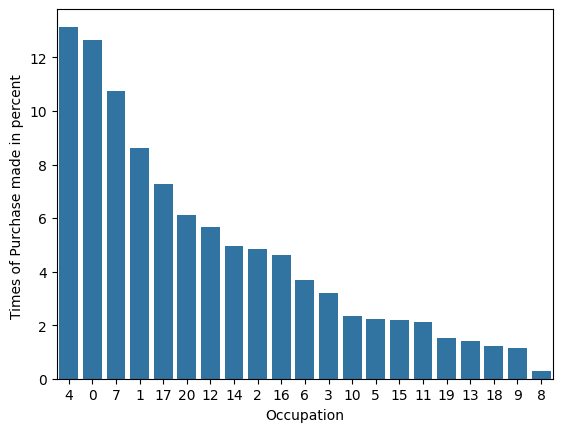

In [ ]:
Occupation_count=df.Occupation.value_counts(ascending=False)
x=Occupation_count.index
y=Occupation_count.values
sns.countplot(data=df,x="Occupation",stat="percent",order=x)
plt.ylabel("Times of Purchase made in percent ")

In [ ]:
city_category=df.City_Category.value_counts(normalize=True) * 100
city_category

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

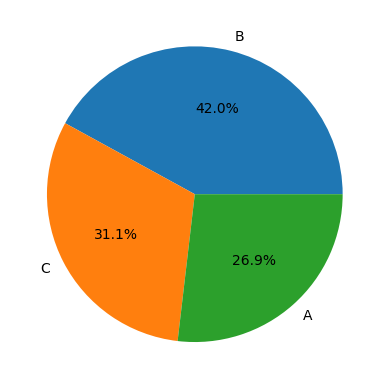

In [ ]:
plt.pie(x=city_category,normalize=True,labels=city_category.index,autopct= '%1.1f%%')
plt.show()

In [ ]:
df.Marital_Status.value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

Text(0, 0.5, 'Count of Purchase made in percentage')

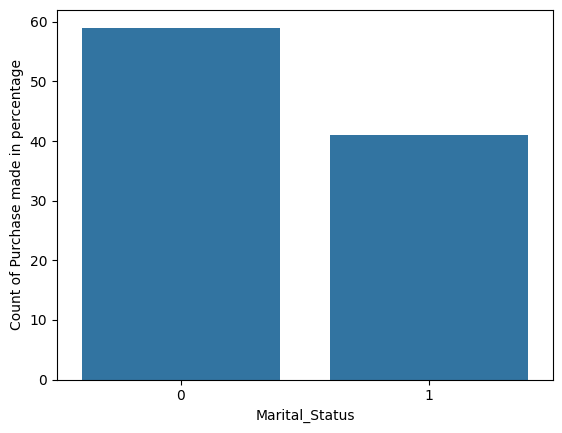

In [ ]:
ax=sns.countplot(data=df,x="Marital_Status",stat="percent")
plt.ylabel("Count of Purchase made in percentage")

In [ ]:
df.Product_Category.value_counts(normalize=True) *100

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

Text(0, 0.5, 'Product category percentage ')

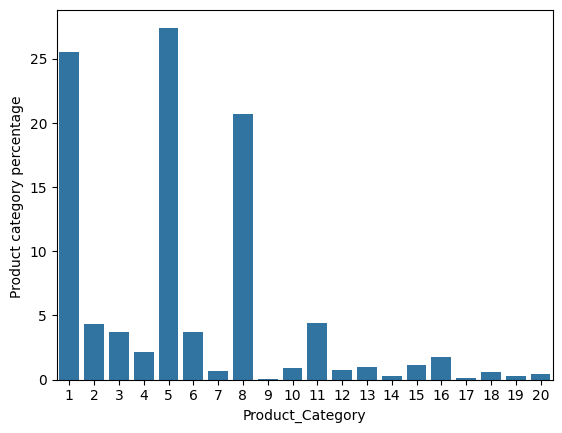

In [ ]:
sns.countplot(x=df.Product_Category,stat="percent")
plt.ylabel("Product category percentage ")

<Axes: xlabel='Purchase', ylabel='Count'>

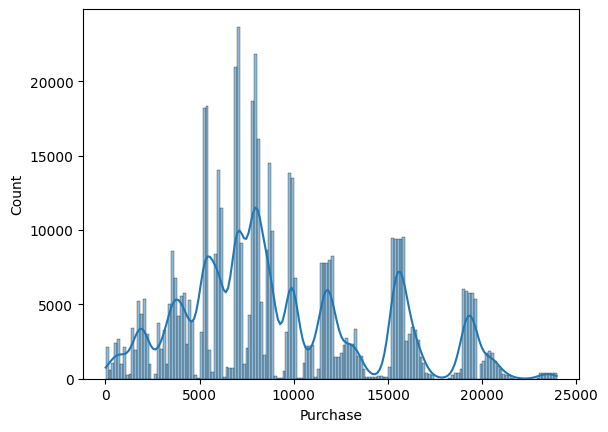

In [ ]:
sns.histplot(df.Purchase,kde=True)

Insights:

* 75% of the purchases are done by **Male** population.
* 40% of total number of sales are by people belonging to **Age-group 26-35**.
* Customers belonging to Occupation Category **4, 0, 7, 1 and 17** are frequent customers indicating that these people may have high spending capacity.
* City category B have highest number of Sales.
* 60% of customers are married.
* **5,1,8,11 and 2** are most popular Product_Category.

## Bivariate Analysis:

Outliers detection:

<Axes: xlabel='Purchase'>

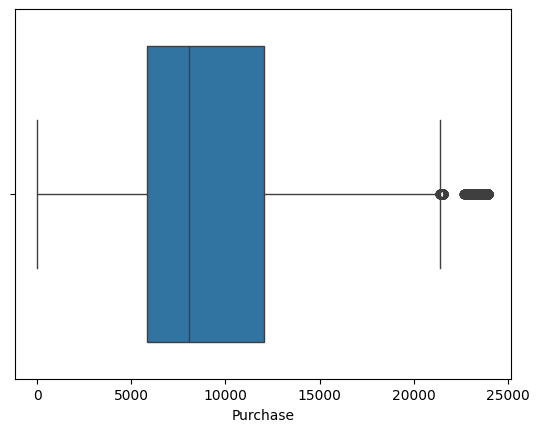

In [ ]:
sns.boxplot(x=df.Purchase)

In [ ]:
np.percentile(df.Purchase,25),np.percentile(df.Purchase,75)

(5823.0, 12054.0)

<ipython-input-36-32195a2fc339>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df.Purchase, x=df.Marital_Status,palette="Spectral")
<ipython-input-36-32195a2fc339>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df.Purchase, x=df.Gender,palette="Spectral")
<ipython-input-36-32195a2fc339>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df.Purchase, x=df.Age,palette="Spectral")
<ipython-input-36-32195a2fc339>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

Text(0.5, 0.98, 'Purchase Analysis with Categorical features')

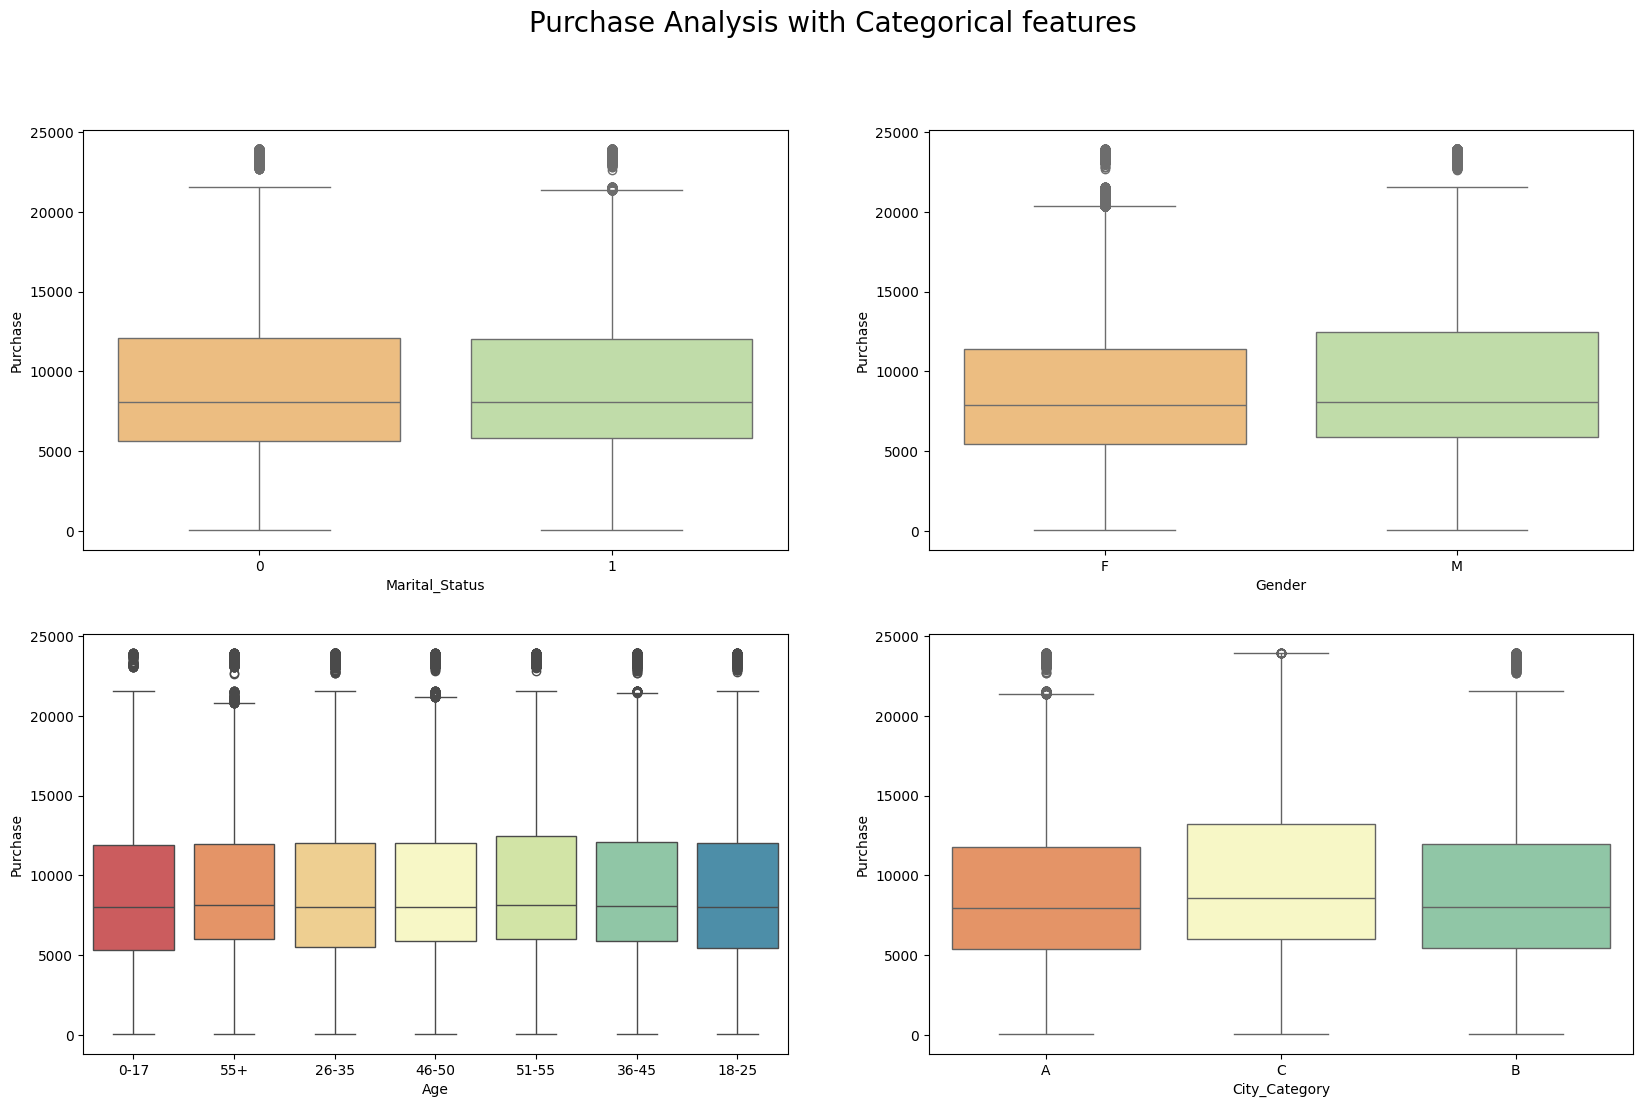

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(y=df.Purchase, x=df.Marital_Status,palette="Spectral")

plt.subplot(2,2,2)
sns.boxplot(y=df.Purchase, x=df.Gender,palette="Spectral")

plt.subplot(2,2,3)
sns.boxplot(y=df.Purchase, x=df.Age,palette="Spectral")

plt.subplot(2,2,4)
sns.boxplot(y=df.Purchase, x=df.City_Category,palette="Spectral")
plt.suptitle("Purchase Analysis with Categorical features",fontsize=20)

In [ ]:
Q1=np.percentile(df.Purchase,25)
Q3=np.percentile(df.Purchase,75)
IQR_Purchase=Q3-Q1
outliers=df[df["Purchase"]>(Q3+1.5*IQR_Purchase)]
outliers_Percentage=len(outliers)/len(df) *100
len(outliers),outliers_Percentage

(2677, 0.4866671029763593)

In [ ]:
#clipping the data
P_5th=int(np.percentile(df.Purchase,5))
P_95th=int(np.percentile(df.Purchase,95))
print("P_5th:  ",P_5th,"\nP_95th:",P_95th)
purchase_clipped=np.clip(df.Purchase,P_5th,P_95th)
purchase_clipped

P_5th:   1984 
P_95th: 19336


0          8370
1         15200
2          1984
3          1984
4          7969
          ...  
550063     1984
550064     1984
550065     1984
550066     1984
550067     1984
Name: Purchase, Length: 550068, dtype: int64

<Axes: xlabel='Purchase'>

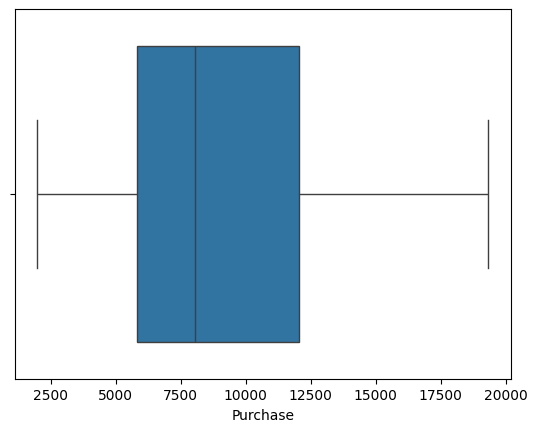

In [ ]:
sns.boxplot(x=purchase_clipped)

<ipython-input-40-c2523bdf474f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=purchase_clipped, x=df.Marital_Status,palette="Spectral")
<ipython-input-40-c2523bdf474f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=purchase_clipped, x=df.Gender,palette="Spectral")
<ipython-input-40-c2523bdf474f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=purchase_clipped, x=df.Age,palette="Spectral")
<ipython-input-40-c2523bdf474f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

Text(0.5, 0.98, 'Purchase Analysis with Categorical features after clipping')

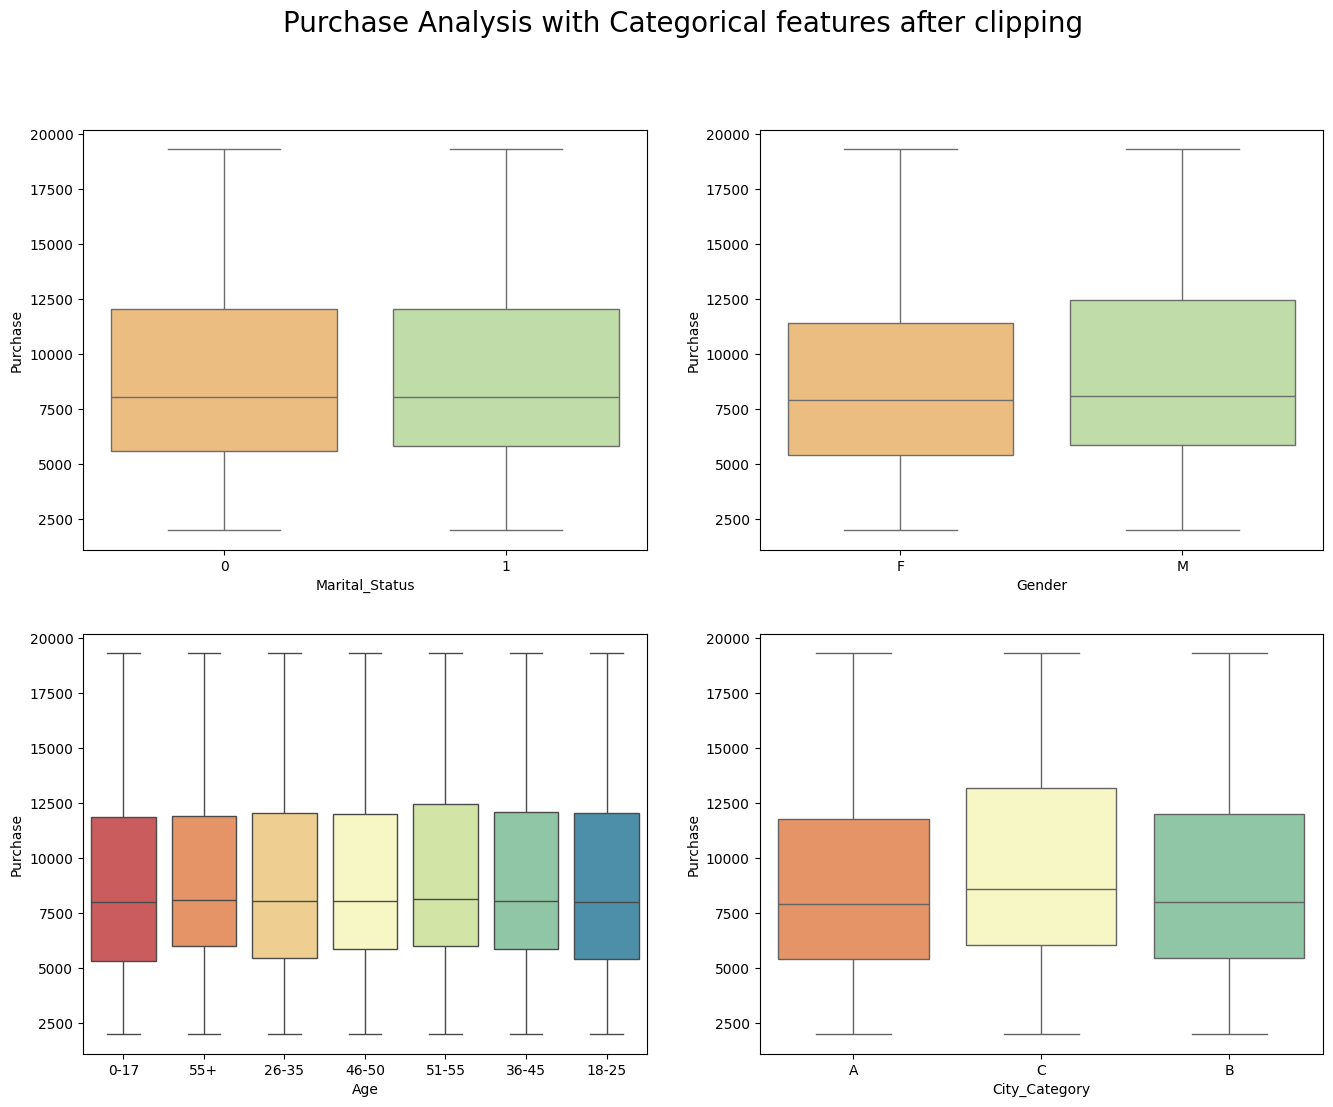

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.boxplot(y=purchase_clipped, x=df.Marital_Status,palette="Spectral")

plt.subplot(2,2,2)
sns.boxplot(y=purchase_clipped, x=df.Gender,palette="Spectral")

plt.subplot(2,2,3)
sns.boxplot(y=purchase_clipped, x=df.Age,palette="Spectral")

plt.subplot(2,2,4)
sns.boxplot(y=purchase_clipped, x=df.City_Category,palette="Spectral")
plt.suptitle("Purchase Analysis with Categorical features after clipping",fontsize=20)

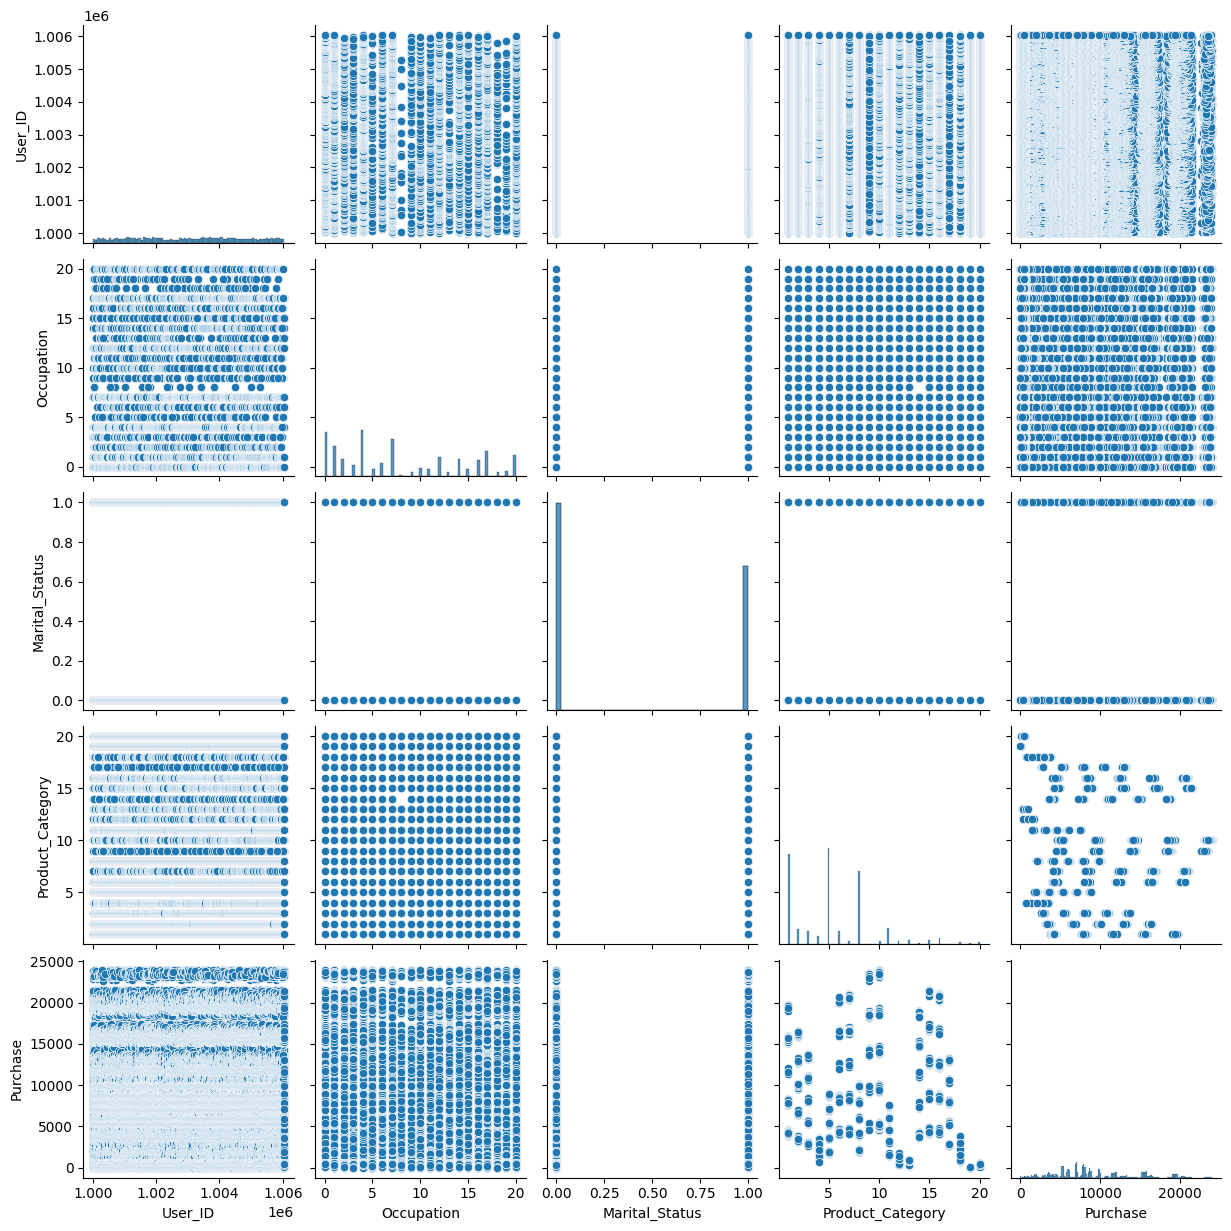

In [ ]:
sns.pairplot(data=df)

In [ ]:
df.groupby("City_Category").Purchase.mean().sort_values(ascending=False)

City_Category
C    9719.920993
B    9151.300563
A    8911.939216
Name: Purchase, dtype: float64

Text(0.5, 1.0, 'Avgerage Purchase amount from City')

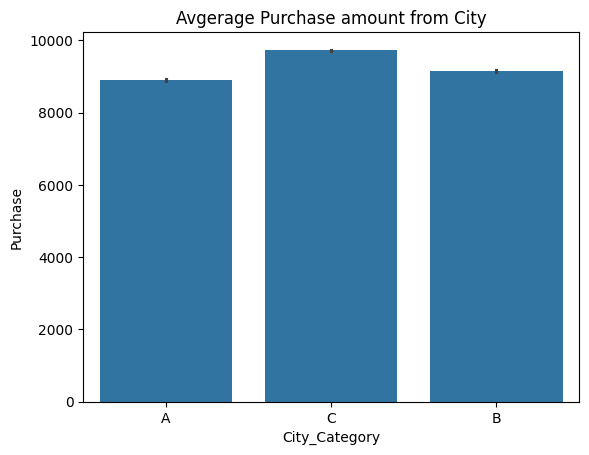

In [ ]:
sns.barplot(data=df,x="City_Category",y="Purchase")
plt.title("Avgerage Purchase amount from City")

In [ ]:
Occupation_count=df.groupby("Occupation").Purchase.sum().sort_values(ascending=False).reset_index()
Occupation_count

,Occupation,Purchase
0,4,666244484
1,0,635406958
2,7,557371587
3,1,424614144
4,17,393281453
5,12,305449446
6,20,296570442
7,14,259454692
8,16,238346955
9,2,238028583


In [ ]:
Occupation_Purchase=df.groupby("Occupation").Purchase.mean().sort_values(ascending=False)
Occupation_Purchase

Occupation
17    9821.478236
12    9796.640239
15    9778.891163
8     9532.592497
14    9500.702772
7     9425.728223
16    9394.464349
5     9333.149298
13    9306.351061
6     9256.535691
4     9213.980251
11    9213.845848
3     9178.593088
18    9169.655844
0     9124.428588
10    8959.355375
1     8953.193270
2     8952.481683
20    8836.494905
19    8710.627231
9     8637.743761
Name: Purchase, dtype: float64

<Axes: xlabel='Occupation', ylabel='Purchase'>

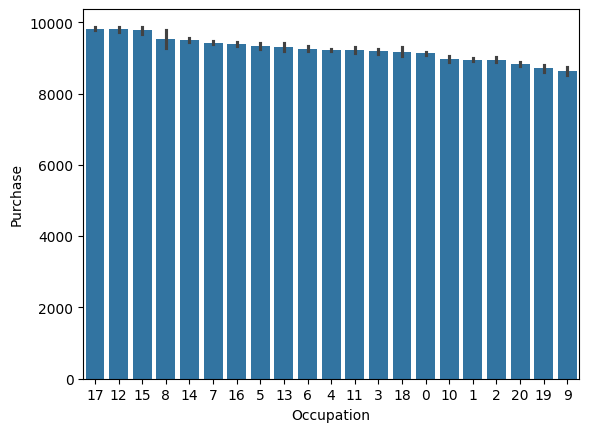

In [ ]:
sns.barplot(data=df,x="Occupation",y="Purchase",estimator=np.mean,order=Occupation_Purchase.index)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

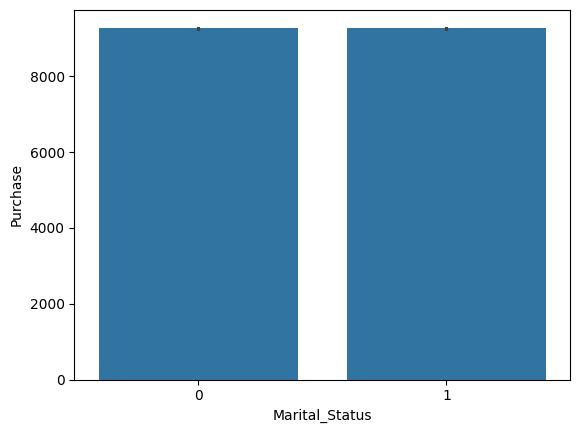

In [ ]:
sns.barplot(data=df,x="Marital_Status",y="Purchase")

In [ ]:
Prod_Category_Purchase_mean=df.groupby("Product_Category").Purchase.mean().sort_values(ascending=False)
Prod_Category_Purchase_mean

Product_Category
10    19675.570927
7     16365.689600
6     15838.478550
9     15537.375610
15    14780.451828
16    14766.037037
1     13606.218596
14    13141.625739
2     11251.935384
17    10170.759516
3     10096.705734
8      7498.958078
5      6240.088178
11     4685.268456
18     2972.864320
4      2329.659491
12     1350.859894
13      722.400613
20      370.481176
19       37.041797
Name: Purchase, dtype: float64

<Axes: xlabel='Product_Category', ylabel='Purchase'>

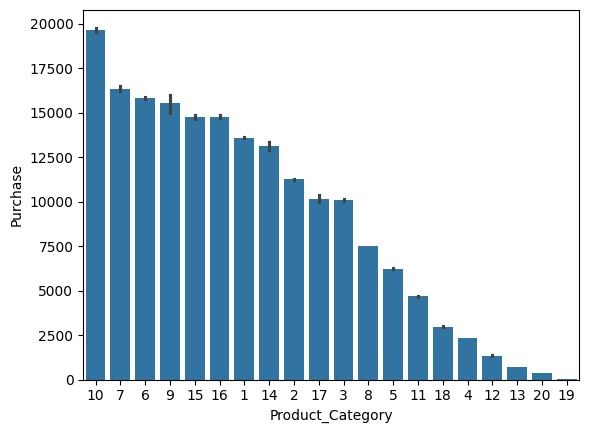

In [ ]:
sns.barplot(data=df,x="Product_Category",y="Purchase",order=Prod_Category_Purchase_mean.index)

<Axes: xlabel='Age', ylabel='Purchase'>

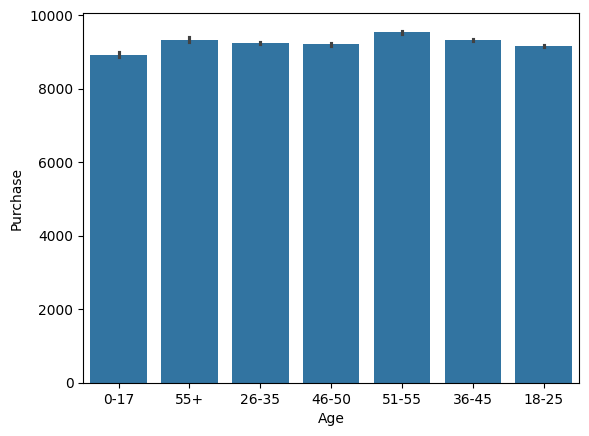

In [ ]:
sns.barplot(data=df, x="Age",y="Purchase")

In [ ]:
df_gender_product=pd.crosstab(df["Gender"],df["Product_Category"],margins=True,margins_name="Total_Number_of_Sales%",normalize=True)*100
df_gender_product

Product_Category,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Total_Number_of_Sales%
Gender,,,,,,,,,,,,,,,,,,,,,
F,4.514169,1.028600,1.091865,0.661555,7.628330,0.828807,0.171433,6.100700,0.012726,0.211247,...,0.278511,0.265785,0.113259,0.190158,0.436673,0.011271,0.069446,0.081990,0.131438,24.689493
M,21.005948,3.309773,2.582772,1.475090,19.810642,2.891824,0.505028,14.610375,0.061811,0.720456,...,0.439037,0.742999,0.163616,0.953337,1.350015,0.093807,0.498666,0.209429,0.332141,75.310507
Total_Number_of_Sales%,25.520118,4.338373,3.674637,2.136645,27.438971,3.720631,0.676462,20.711076,0.074536,0.931703,...,0.717548,1.008784,0.276875,1.143495,1.786688,0.105078,0.568112,0.291419,0.463579,100.000000


<Axes: xlabel='Product_Category', ylabel='percent'>

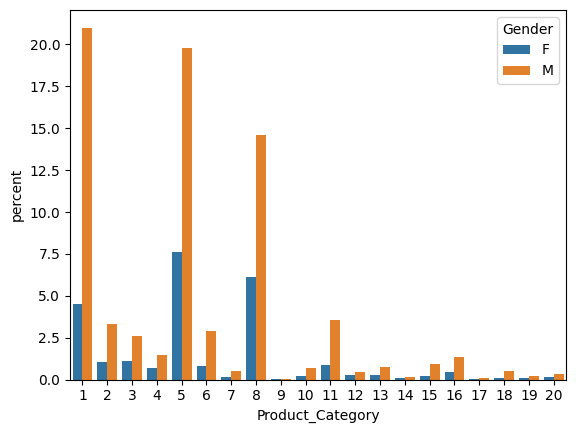

In [ ]:
sns.countplot(data=df,x="Product_Category",hue="Gender",stat="percent")

In [ ]:
df_age_product=pd.crosstab(df["Age"],df["Product_Category"],margins=True,margins_name="Total_Number_of_Purchase%",normalize=True)*100
df_age_product

Product_Category,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Total_Number_of_Purchase%
Age,,,,,,,,,,,,,,,,,,,,,
0-17,0.651738,0.146346,0.218155,0.137801,0.787175,0.072536,0.009635,0.410495,0.002909,0.020179,...,0.022724,0.020361,0.007090,0.029087,0.041631,0.001091,0.004908,0.010726,0.016362,2.745479
18-25,4.901576,0.804991,0.856258,0.447763,5.185177,0.681552,0.087444,3.256143,0.011453,0.109623,...,0.079808,0.137438,0.041813,0.186159,0.290510,0.007454,0.061629,0.049994,0.085262,18.117760
26-35,10.589418,1.623072,1.392919,0.762088,11.175527,1.542537,0.300145,8.045551,0.027997,0.324869,...,0.199248,0.381044,0.102533,0.431219,0.748635,0.023088,0.189431,0.102351,0.163253,39.919974
36-45,5.026288,0.892981,0.700641,0.427947,5.340612,0.708821,0.147073,4.235113,0.019452,0.224518,...,0.180705,0.227245,0.056720,0.253605,0.355411,0.024542,0.127621,0.058175,0.091989,19.999891
46-50,1.904128,0.382680,0.250151,0.179978,2.176276,0.294873,0.059447,1.937215,0.005999,0.094534,...,0.094534,0.100169,0.027088,0.109441,0.159798,0.017271,0.063810,0.027088,0.041268,8.308246
51-55,1.645069,0.323778,0.167979,0.123257,1.798505,0.263604,0.048358,1.697972,0.005272,0.094352,...,0.078718,0.087807,0.027997,0.092352,0.122167,0.019452,0.076900,0.024361,0.036359,6.999316
55+,0.801901,0.164525,0.088535,0.057811,0.975698,0.156708,0.024361,1.128588,0.001454,0.063628,...,0.061811,0.054721,0.013635,0.041631,0.068537,0.012180,0.043813,0.018725,0.029087,3.909335
Total_Number_of_Purchase%,25.520118,4.338373,3.674637,2.136645,27.438971,3.720631,0.676462,20.711076,0.074536,0.931703,...,0.717548,1.008784,0.276875,1.143495,1.786688,0.105078,0.568112,0.291419,0.463579,100.000000


In [ ]:
df_Marital_product=pd.crosstab(df["Marital_Status"],df["Product_Category"],margins=True,margins_name="Total_Purchase%",normalize=True)*100
df_Marital_product

Product_Category,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Total_Purchase%
Marital_Status,,,,,,,,,,,,,,,,,,,,,
0,15.339013,2.570228,2.246813,1.304748,16.299076,2.206818,0.370863,11.891439,0.044904,0.505028,...,0.369772,0.574838,0.153799,0.658646,1.038599,0.054175,0.298327,0.171979,0.269058,59.034701
1,10.181105,1.768145,1.427823,0.831897,11.139895,1.513813,0.305599,8.819637,0.029633,0.426675,...,0.347775,0.433946,0.123076,0.484849,0.748089,0.050903,0.269785,0.119440,0.194521,40.965299
Total_Purchase%,25.520118,4.338373,3.674637,2.136645,27.438971,3.720631,0.676462,20.711076,0.074536,0.931703,...,0.717548,1.008784,0.276875,1.143495,1.786688,0.105078,0.568112,0.291419,0.463579,100.000000


<Axes: xlabel='Product_Category', ylabel='Purchase'>

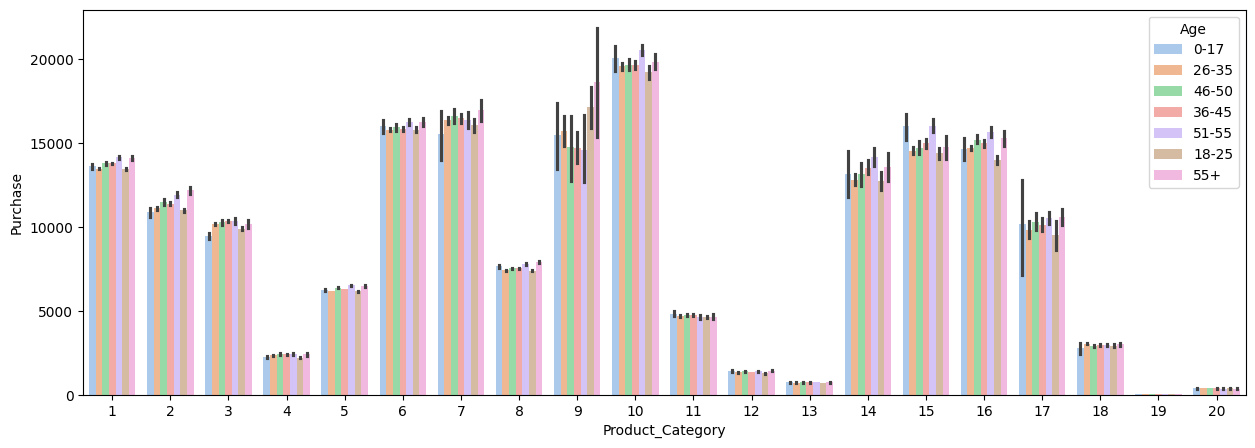

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.Product_Category,y=df.Purchase,hue=df.Age,palette="pastel")

<Axes: xlabel='Product_Category', ylabel='count'>

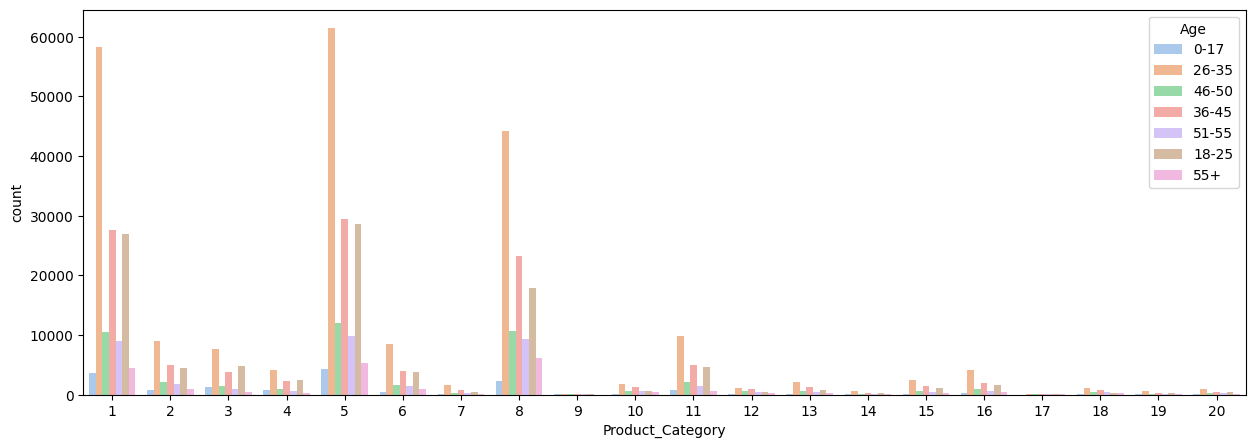

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=df.Product_Category,hue=df.Age,palette="pastel")

Insights:
* Dataset has 0.48% outliers which is about 2.5k transactions in total.
After data clipping, there are no outliers.
* Although City_Category B has highest number of sales to it, City_Category C has highest average sales.
* Occupation category 17 has highest average sales.
* Average Sales is not dependent on Marital Status.
* Product_Category 10, 7, 6, 9 and 15 seems to have costly products.
* Age group "51-55" and "55+" both have higher average purchase amount than
  Age group "26-35". It may indicate that young people may be store more than once in month or over a specified time-period while people with Age 50+ make less visits for same time-period.
* Products from Product_Category 1,5 and 8 are popular irrespective of Gender, Age and Marital status.  

## Purchase Analysis based on Gender:

In [ ]:
df.groupby("Gender")[["Purchase"]].describe()

Purchase                                                           \
           count         mean          std   min     25%     50%      75%   
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

                 
            max  
Gender           
F       23959.0  
M       23961.0

<Axes: xlabel='Purchase', ylabel='Density'>

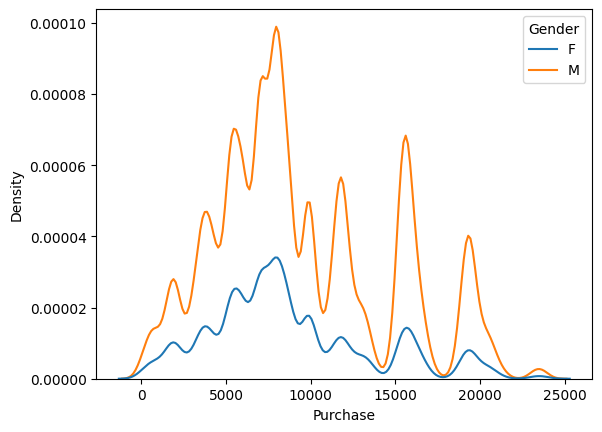

In [ ]:
sns.kdeplot(data=df, x="Purchase", hue="Gender")

As we can see that the distributions of spending nature of males and females both are not normal, we will be taking samples  to apply Central Limit theorem to have normalized sampling distribution.

In [ ]:
df_male_300=[df[df["Gender"]=="M"].sample(300,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for males when sample size = 300 : ", np.mean(df_male_300))
df_female_300=[df[df["Gender"]=="F"].sample(300,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for females when sample size = 300 : ", np.mean(df_female_300))

Mean for males when sample size = 300 :  9429.369596666667
Mean for females when sample size = 300 :  8729.793710000002


In [ ]:
print("df_male_300 95% CI   :",np.percentile(df_male_300,[2.75,9.75]))
print("df_female_300 95% CI :",np.percentile(df_female_300,[2.75,9.75]))

df_male_300 95% CI   : [8881.12316667 9044.218375  ]
df_female_300 95% CI : [8185.84058333 8395.69945   ]


<Axes: ylabel='Count'>

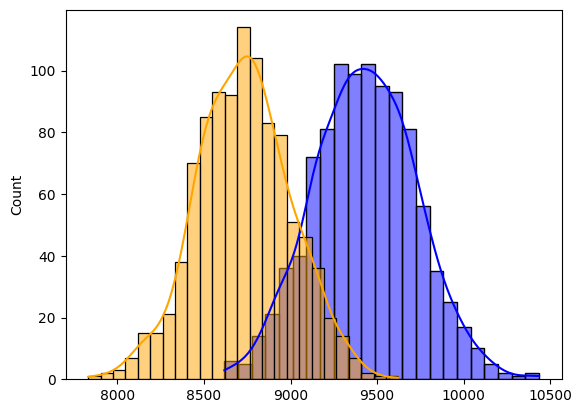

In [ ]:
sns.histplot(df_male_300,kde=True,color="blue")
sns.histplot(df_female_300,kde=True,color="orange")

In [ ]:
df_male_3000=[df[df["Gender"]=="M"].sample(3000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for males when sample size = 3000 : ", np.mean(df_male_3000))
df_female_3000=[df[df["Gender"]=="F"].sample(3000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for females when sample size = 3000 : ", np.mean(df_female_3000))

Mean for males when sample size = 3000 :  9437.506917333334
Mean for females when sample size = 3000 :  8737.213675666668


In [ ]:
print("df_male_3000 95% CI   :",np.percentile(df_male_3000,[2.75,9.75]))
print("df_female_3000 95% CI :",np.percentile(df_female_3000,[2.75,9.75]))

df_male_3000 95% CI   : [9261.68770583 9324.16036167]
df_female_3000 95% CI : [8571.59038    8621.98911417]


<Axes: ylabel='Count'>

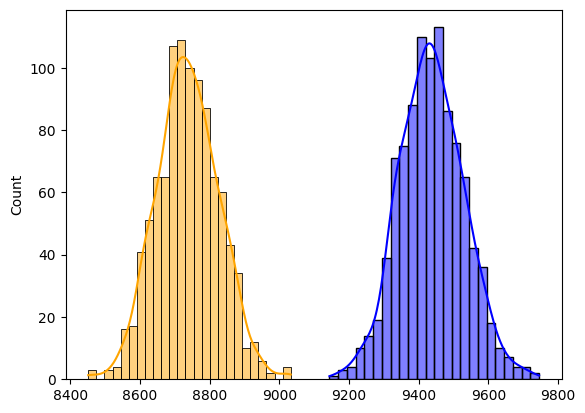

In [ ]:
sns.histplot(df_male_3000,kde=True,color="blue")
sns.histplot(df_female_3000,kde=True,color="orange")

In [ ]:
df_male_30000=[df[df["Gender"]=="M"].sample(30000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for males when sample size = 30000 : ", np.mean(df_male_300))
df_female_30000=[df[df["Gender"]=="F"].sample(30000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for females when sample size = 30000 : ", np.mean(df_female_30000))

Mean for males when sample size = 30000 :  9429.369596666667
Mean for females when sample size = 30000 :  8734.811319433331


In [ ]:
print("df_male_30000 95% CI   :",np.percentile(df_male_30000,[2.75,9.75]))
print("df_female_30000 95% CI :",np.percentile(df_female_30000,[2.75,9.75]))

df_male_30000 95% CI   : [9380.59917158 9396.80720733]
df_female_30000 95% CI : [8681.07037858 8699.32140175]


<Axes: ylabel='Count'>

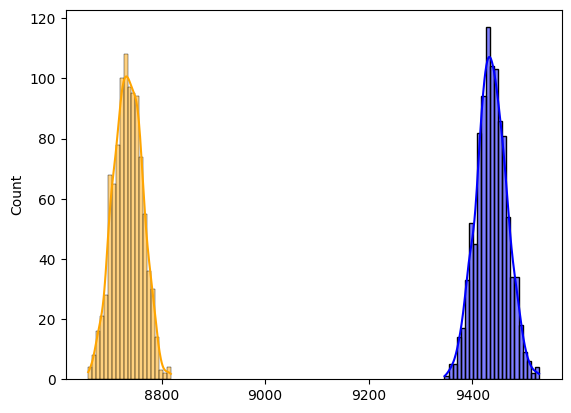

In [ ]:
sns.histplot(df_male_30000,kde=True,color="blue")
sns.histplot(df_female_30000,kde=True,color="orange")

Insights:

The male population is represented by blue color and female population by orange color. All analysis is with 95% Confidence Interval.  
 * The sampling distribution obtained for sample size 300 and 1000 iterations for male and female population was overlapping. Hence, any conclusions on male and female spending can not be said.
 * As the sample size was increased to 3000, the distinction between the male  and female population spending is visible. It can also be seen the peak of distribution is becoming higher and distribution is becoming less varied.

 * Upon increasing furthermore to 30000, there is clear distinction between male and female spending nature distribution with higher peak and less variance .
 * Average purchase amount for males is in range of [9380.1772, 9398.8195] which is slightly higher than for females [8684.1693 8701.1183].


## Purchase Analysis Based on Marital Status

In [ ]:
df.groupby("Marital_Status")[["Purchase"]].describe()

Purchase                                                  \
                   count         mean          std   min     25%     50%   
Marital_Status                                                             
0               324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
1               225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                                  
                    75%      max  
Marital_Status                    
0               12061.0  23961.0  
1               12042.0  23961.0

<Axes: xlabel='Purchase', ylabel='Density'>

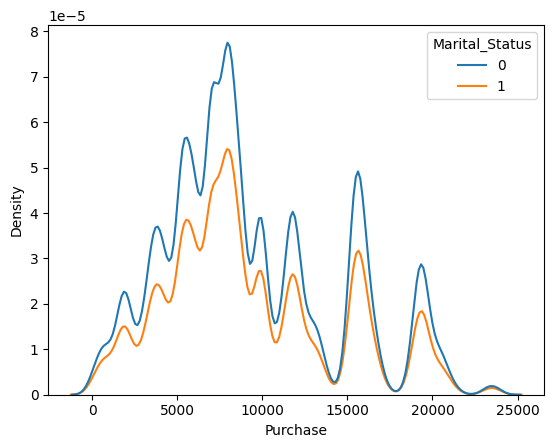

In [ ]:
sns.kdeplot(data=df, x="Purchase", hue="Marital_Status")

As we can see that the distributions of spending nature of married and unmarried population both are not normal,
we will be taking samples to apply Central Limit theorem to have normalized sampling distributions.

In [ ]:
df_unmarried_300=[df[df["Marital_Status"]==0].sample(300,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for unmarried population when sample size = 300 : ", np.mean(df_male_300))
df_married_300=[df[df["Marital_Status"]==1].sample(300,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for married population when sample size = 300 : ", np.mean(df_female_300))

Mean for unmarried population when sample size = 300 :  9429.369596666667
Mean for married population when sample size = 300 :  8729.793710000002


In [ ]:
print("df_unmarried_300 95% CI   :",np.percentile(df_male_300,[2.75,9.75]))
print("df_married_300 95% CI :",np.percentile(df_female_300,[2.75,9.75]))

df_unmarried_300 95% CI   : [8881.12316667 9044.218375  ]
df_married_300 95% CI : [8185.84058333 8395.69945   ]


<Axes: ylabel='Count'>

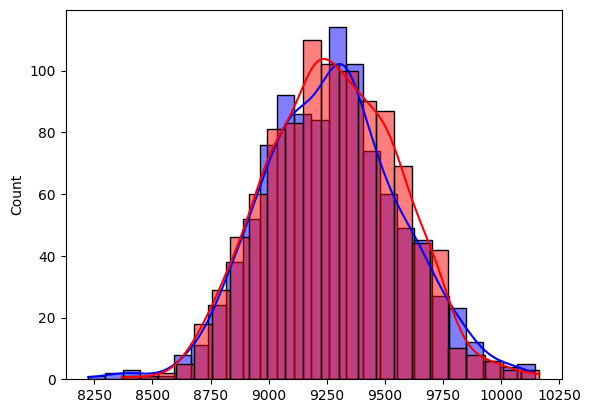

In [ ]:
sns.histplot(df_unmarried_300,kde=True, color="blue")
sns.histplot(df_married_300,kde=True, color="red")

In [ ]:
df_unmarried_3000=[df[df["Marital_Status"]==0].sample(3000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for unmarried population when sample size = 3000 : ", np.mean(df_male_3000))
df_married_3000=[df[df["Marital_Status"]==1].sample(3000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for married population when sample size = 3000 : ", np.mean(df_female_3000))

Mean for unmarried population when sample size = 3000 :  9437.506917333334
Mean for married population when sample size = 3000 :  8737.213675666668


In [ ]:
print("df_unmarried_3000 95% CI :",np.percentile(df_male_3000,[2.75,9.75]))
print("df_married_3000 95% CI   :",np.percentile(df_female_3000,[2.75,9.75]))

df_unmarried_3000 95% CI : [9261.68770583 9324.16036167]
df_married_3000 95% CI   : [8571.59038    8621.98911417]


<Axes: ylabel='Count'>

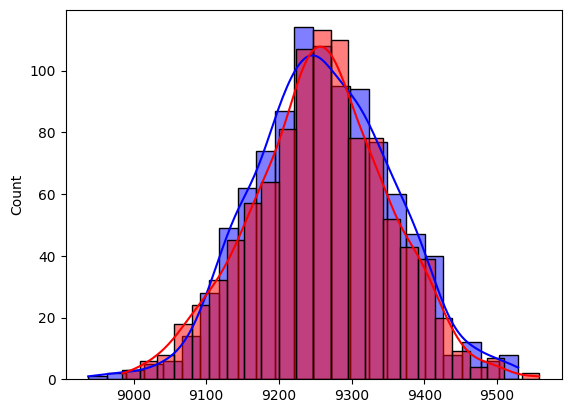

In [ ]:
sns.histplot(df_unmarried_3000,kde=True, color="blue")
sns.histplot(df_married_3000,kde=True, color="red")

In [ ]:
df_unmarried_30000=[df[df["Marital_Status"]==0].sample(30000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for unmarried population when sample size = 30000 : ", np.mean(df_unmarried_30000))
df_married_30000=[df[df["Marital_Status"]==1].sample(30000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for married population when sample size = 30000 : ", np.mean(df_married_30000))

Mean for unmarried population when sample size = 30000 :  9264.792035733333
Mean for married population when sample size = 30000 :  9259.533927933333


In [ ]:
print("df_unmarried_30000 95% CI :",np.percentile(df_unmarried_30000,[2.75,9.75]))
print("df_married_30000 95% CI   :",np.percentile(df_married_30000,[2.75,9.75]))

df_unmarried_30000 95% CI : [9210.183541   9227.99991017]
df_married_30000 95% CI   : [9205.84532433 9221.97391025]


<Axes: ylabel='Count'>

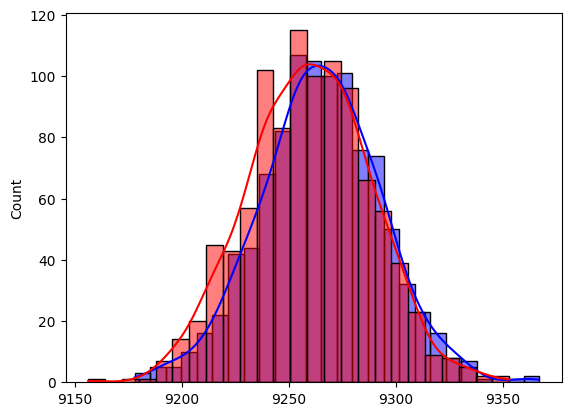

In [ ]:
sns.histplot(df_unmarried_30000,kde=True, color="blue")
sns.histplot(df_married_30000,kde=True, color="red")

Insights:

The unmarried population is represented by blue color and married population by red color. All analysis is done with 95% Confidence Interval.

* The sampling distribution obtained for sample size =300,3000 and 30000 and 1000 iterations for married and unmarried population is fully overlapping. Hence,there is no differnce in spending power of population based on Marital Status.
*The Average spending is in range  [9212.6546715 9232.9144835] for unmarried and for married is in range
   [9206.01273517 9224.47995767]. Both  married and unmarried population collective average spending can be said to be  in range [9200 , 9235] with 95% CI.

## Purchase Analysis based on Age-Group

In [ ]:
df.groupby("Age")[["Purchase"]].describe()

Purchase                                                           \
          count         mean          std   min     25%     50%      75%   
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

                
           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

<Axes: xlabel='Purchase', ylabel='Density'>

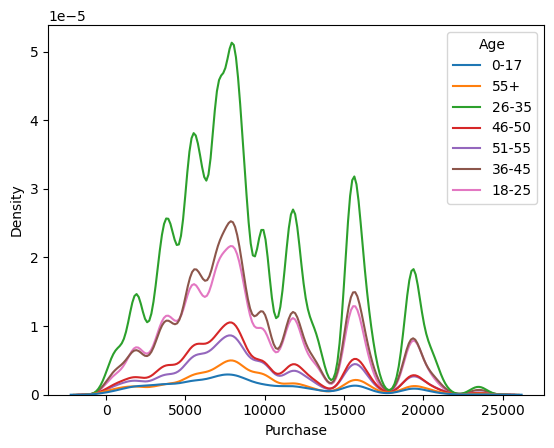

In [ ]:
sns.kdeplot(data=df,x="Purchase", hue="Age")

As we can see that the distributions of spending nature of different age-groups population are not normal, we will be taking samples to apply Central Limit theorem to have normalized sampling distributions.

In [ ]:
df_0_t0_17_300=[df[df["Age"]=="0-17"].sample(300,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 0_t0_17 when sample size = 300  : ", np.mean(df_0_t0_17_300))

df_18_to_25_300=[df[df["Age"]=="18-25"].sample(300,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 18_to_25 when sample size = 300 : ", np.mean(df_18_to_25_300))

df_26_to_35_300=[df[df["Age"]=="26-35"].sample(300,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 26_to_35 when sample size = 300 : ", np.mean(df_26_to_35_300))

df_36_to_45_300=[df[df["Age"]=="36-45"].sample(300,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 36_to_45 when sample size = 300 : ", np.mean(df_36_to_45_300))

df_46_to_50_300=[df[df["Age"]=="46-50"].sample(300,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 46_to_50 when sample size = 300 : ", np.mean(df_46_to_50_300))

df_51_to_55_300=[df[df["Age"]=="51-55"].sample(300,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 51_to_55 when sample size = 300 : ", np.mean(df_51_to_55_300))

df_55plus_300=[df[df["Age"]=="55+"].sample(300,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 55+ when sample size = 300 : ", np.mean(df_55plus_300))


Mean for population with age 0_t0_17 when sample size = 300  :  8932.726626666665
Mean for population with age 18_to_25 when sample size = 300 :  9169.772459999998
Mean for population with age 26_to_35 when sample size = 300 :  9253.887460000002
Mean for population with age 36_to_45 when sample size = 300 :  9328.339196666666
Mean for population with age 46_to_50 when sample size = 300 :  9218.233373333333
Mean for population with age 51_to_55 when sample size = 300 :  9528.248646666667
Mean for population with age 55+ when sample size = 300 :  9322.167830000002


In [ ]:
print("df_0_t0_17_300 95% CI :",np.percentile(df_0_t0_17_300,[2.75,9.75]))
print("df_18_to_25_300 95% CI :",np.percentile(df_18_to_25_300,[2.75,9.75]))
print("df_26_to_35_300 95% CI :",np.percentile(df_26_to_35_300,[2.75,9.75]))
print("df_36_to_45_300 95% CI :",np.percentile(df_36_to_45_300,[2.75,9.75]))
print("df_46_to_50_300 95% CI   :",np.percentile(df_46_to_50_300,[2.75,9.75]))
print("df_51_to_55_300 95% CI :",np.percentile(df_51_to_55_300,[2.75,9.75]))
print("df_55plus_300 95% CI   :",np.percentile(df_55plus_300,[2.75,9.75]))

df_0_t0_17_300 95% CI : [8347.93926667 8519.0588    ]
df_18_to_25_300 95% CI : [8602.62533333 8790.5122    ]
df_26_to_35_300 95% CI : [8732.89295  8891.212075]
df_36_to_45_300 95% CI : [8807.881275 8969.0522  ]
df_46_to_50_300 95% CI   : [8685.8024     8828.67655833]
df_51_to_55_300 95% CI : [8984.38688333 9148.97033333]
df_55plus_300 95% CI   : [8770.66108333 8948.48978333]


<Axes: ylabel='Count'>

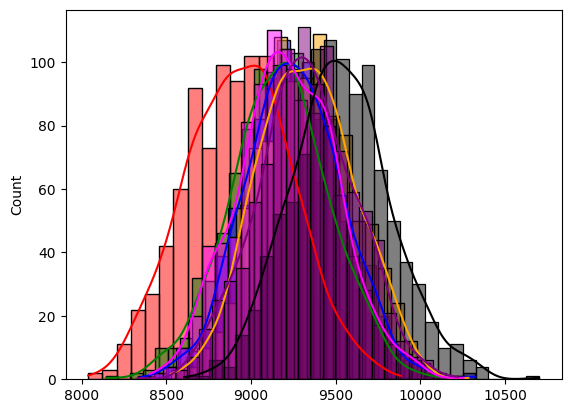

In [ ]:
sns.histplot(df_0_t0_17_300,kde=True,color="red")
sns.histplot(df_18_to_25_300,kde=True,color="green")
sns.histplot(df_26_to_35_300,kde=True,color="blue")
sns.histplot(df_36_to_45_300,kde=True,color="orange")
sns.histplot(df_46_to_50_300,kde=True,color="magenta")
sns.histplot(df_51_to_55_300,kde=True,color="black")
sns.histplot(df_55plus_300,kde=True,color="purple")

In [ ]:
df_0_t0_17_3000=[df[df["Age"]=="0-17"].sample(3000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 0_t0_17 when sample size = 3000 : ", np.mean(df_0_t0_17_3000))

df_18_to_25_3000=[df[df["Age"]=="18-25"].sample(3000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 18_to_25 when sample size = 3000 : ", np.mean(df_18_to_25_3000))

df_26_to_35_3000=[df[df["Age"]=="26-35"].sample(3000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 26_to_35 when sample size = 3000 : ", np.mean(df_26_to_35_3000))

df_36_to_45_3000=[df[df["Age"]=="36-45"].sample(3000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 36_to_45 when sample size = 3000 : ", np.mean(df_36_to_45_3000))

df_46_to_50_3000=[df[df["Age"]=="46-50"].sample(3000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 46_to_50 when sample size = 3000 : ", np.mean(df_46_to_50_3000))

df_51_to_55_3000=[df[df["Age"]=="51-55"].sample(3000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 51_to_55 when sample size = 3000 : ", np.mean(df_51_to_55_3000))

df_55plus_3000=[df[df["Age"]=="55+"].sample(3000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 55+ when sample size = 3000 : ", np.mean(df_55plus_3000))

Mean for population with age 0_t0_17 when sample size = 3000 :  8936.05511
Mean for population with age 18_to_25 when sample size = 3000 :  9168.298110333333
Mean for population with age 26_to_35 when sample size = 3000 :  9253.140459333334
Mean for population with age 36_to_45 when sample size = 3000 :  9332.894766333335
Mean for population with age 46_to_50 when sample size = 3000 :  9214.663945333334
Mean for population with age 51_to_55 when sample size = 3000 :  9534.346846
Mean for population with age 55+ when sample size = 3000 :  9333.300581


In [ ]:
print("df_0_t0_17_3000 95% CI  :",np.percentile(df_0_t0_17_3000,[2.75,9.75]))
print("df_18_to_25_3000 95% CI :",np.percentile(df_18_to_25_3000,[2.75,9.75]))
print("df_26_to_35_3000 95% CI :",np.percentile(df_26_to_35_3000,[2.75,9.75]))
print("df_36_to_45_3000 95% CI :",np.percentile(df_36_to_45_3000,[2.75,9.75]))
print("df_46_to_50_3000 95% CI :",np.percentile(df_46_to_50_3000,[2.75,9.75]))
print("df_51_to_55_3000 95% CI :",np.percentile(df_51_to_55_3000,[2.75,9.75]))
print("df_55plus_3000 95% CI   :",np.percentile(df_55plus_3000,[2.75,9.75]))

df_0_t0_17_3000 95% CI  : [8760.63571083 8815.35471417]
df_18_to_25_3000 95% CI : [8994.5093275 9044.453905 ]
df_26_to_35_3000 95% CI : [9079.588995  9134.4137775]
df_36_to_45_3000 95% CI : [9170.42604917 9218.6350925 ]
df_46_to_50_3000 95% CI : [9043.61710833 9098.79325   ]
df_51_to_55_3000 95% CI : [9357.92448167 9414.41479167]
df_55plus_3000 95% CI   : [9161.52316333 9213.700285  ]


<Axes: ylabel='Count'>

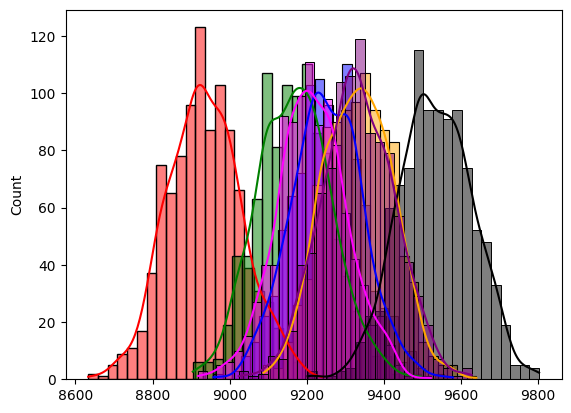

In [ ]:
sns.histplot(df_0_t0_17_3000,kde=True,color="red")
sns.histplot(df_18_to_25_3000,kde=True,color="green")
sns.histplot(df_26_to_35_3000,kde=True,color="blue")
sns.histplot(df_36_to_45_3000,kde=True,color="orange")
sns.histplot(df_46_to_50_3000,kde=True,color="magenta")
sns.histplot(df_51_to_55_3000,kde=True,color="black")
sns.histplot(df_55plus_3000,kde=True,color="purple")

In [ ]:
df_0_t0_17_30000=[df[df["Age"]=="0-17"].sample(30000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 0_t0_17 when sample size = 30000 : ", np.mean(df_0_t0_17_30000))

df_18_to_25_30000=[df[df["Age"]=="18-25"].sample(30000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 18_to_25 when sample size = 30000 : ", np.mean(df_18_to_25_30000))

df_26_to_35_30000=[df[df["Age"]=="26-35"].sample(30000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 26_to_35 when sample size = 30000 : ", np.mean(df_26_to_35_30000))

df_36_to_45_30000=[df[df["Age"]=="36-45"].sample(30000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 36_to_45 when sample size = 30000 : ", np.mean(df_36_to_45_30000))

df_46_to_50_30000=[df[df["Age"]=="46-50"].sample(30000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 46_to_50 when sample size = 30000 : ", np.mean(df_46_to_50_30000))

df_51_to_55_30000=[df[df["Age"]=="51-55"].sample(30000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 51_to_55 when sample size = 30000 : ", np.mean(df_51_to_55_30000))

df_55plus_30000=[df[df["Age"]=="55+"].sample(30000,replace=True).Purchase.mean() for i in range(1000)]
print("Mean for population with age 55+ when sample size = 30000 : ", np.mean(df_55plus_30000))

Mean for population with age 0_t0_17 when sample size = 30000 :  8932.0651227
Mean for population with age 18_to_25 when sample size = 30000 :  9169.152381200001
Mean for population with age 26_to_35 when sample size = 30000 :  9251.724472966667
Mean for population with age 36_to_45 when sample size = 30000 :  9331.892106533334
Mean for population with age 46_to_50 when sample size = 30000 :  9209.026157033333
Mean for population with age 51_to_55 when sample size = 30000 :  9533.759154133333
Mean for population with age 55+ when sample size = 30000 :  9336.670821200001


In [ ]:
print("df_0_t0_17_30000 95% CI  :",np.percentile(df_0_t0_17_30000,[2.75,9.75]))
print("df_18_to_25_30000 95% CI :",np.percentile(df_18_to_25_30000,[2.75,9.75]))
print("df_26_to_35_30000 95% CI :",np.percentile(df_26_to_35_30000,[2.75,9.75]))
print("df_36_to_45_30000 95% CI :",np.percentile(df_36_to_45_30000,[2.75,9.75]))
print("df_46_to_50_30000 95% CI :",np.percentile(df_46_to_50_30000,[2.75,9.75]))
print("df_51_to_55_30000 95% CI :",np.percentile(df_51_to_55_30000,[2.75,9.75]))
print("df_55plus_30000 95% CI   :",np.percentile(df_55plus_30000,[2.75,9.75]))

df_0_t0_17_30000 95% CI  : [8873.80741017 8894.95322867]
df_18_to_25_30000 95% CI : [9110.43428942 9132.5022005 ]
df_26_to_35_30000 95% CI : [9195.7571255  9212.94799117]
df_36_to_45_30000 95% CI : [9277.69464717 9293.86964   ]
df_46_to_50_30000 95% CI : [9155.69190092 9172.559255  ]
df_51_to_55_30000 95% CI : [9479.201631   9496.29977567]
df_55plus_30000 95% CI   : [9281.28602775 9298.10674775]


<Axes: ylabel='Count'>

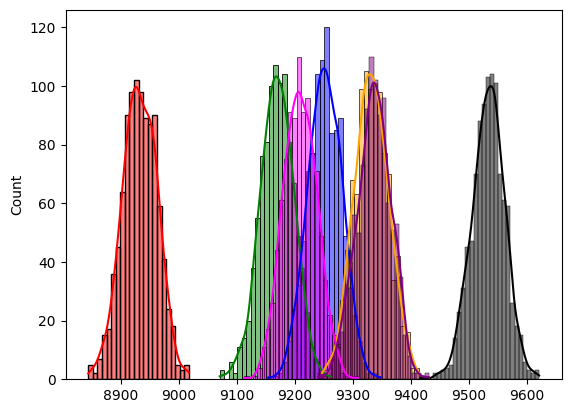

In [ ]:
sns.histplot(df_0_t0_17_30000,kde=True,color="red")
sns.histplot(df_18_to_25_30000,kde=True,color="green")
sns.histplot(df_26_to_35_30000,kde=True,color="blue")
sns.histplot(df_36_to_45_30000,kde=True,color="orange")
sns.histplot(df_46_to_50_30000,kde=True,color="magenta")
sns.histplot(df_51_to_55_30000,kde=True,color="black")
sns.histplot(df_55plus_30000,kde=True,color="purple")

Insights:

The different age groups in population are represented by different colors.
 All analysis is done with 95% Confidence Interval
 * The sampling distribution obtained for sample size =300 and 1000 iterations for different age groups of population is too much overlapping. Hence, any conclusions can not be said for n=300.
 * Upon increasing the sample size to 3000, distribution for age group groups "0-17" and "51-55" tend to distinct themselves from others. Other age group distribution tend to overlap with no clear boundaries.
 * Further incresing sample size to 30000, age-groups "0-17" and "51-55" tend to clearly distinct themselves from others. Distribution for age group groups "18-25", "26-35" and "45-50" are forming a close band with "45-50" at center. Age groups"36-45" and "55+" are completely overlapping indicating almost same spending distribution.
 * Average spending for different age groups is in range:
  
  * 0- 17 : [8875.67614475 8893.63454258]
  *  18-25 : [9113.75881367 9131.67955567]
  *  26-35 : [9199.5893395  9215.87101133]
  *  36-45 : [9278.72581308 9296.631707  ]
  *  46-50: [9153.55385758 9171.83058575]
  *  51-55 : [9477.20328767 9496.1819795 ]
  *  55+ : [9277.35194867 9296.88432575]

 * Age-group "0-17" spends lowest in comparison to others while age-group "26-35" spends most.


## Overall Insights:

* Dataset has 550068 entries(rows). Every entry has 10 values (columns) associated with it.
* Dataset has spending information of about 5891 unique customers.
* There are no null values or duplicated rows.
* There are over 3600 products categorized under 20 categories.
* There are 3 City categories (A,B and C).
* 75% of the purchases are done by Male population.
* 40% of total number of sales are by people belonging to Age-group 26-35.
* 60% of customer base is married.
* 5,1,8,11 and 2 are most popular Product_Category. Products from Product_Category 1,5 and 8 are popular irrespective of Gender, Age and Marital status.  
* Dataset has 0.48% outliers which is about 2.5k transactions in total.
* Although City_Category B has highest number of sales to it, City_Category C has highest average sales.
* Product_Category 10, 7, 6, 9 and 15 seems to have costly products as their average purchase amount is high.



## Recommendations:

* Engaging Younger Customers (0-17):

  * Targeted Promotions: Implement targeted discounts or loyalty programs to incentivize this age group to spend more.
  * Product Diversification: Expand product variety to cater to their specific preferences (e.g., video games, toys, trendy clothing).
* Increasing Visits for Mid-Life Spenders (51-55+):

  * Limited-Time Offers: Introduce strategic time-limited coupons or discounts to encourage more frequent store visits from this group, known for higher average spending but lower transaction frequency compared to younger demographics.
* Enhancing Accessibility for Seniors (50+):

  * Improved Store Infrastructure: Ensure stores are well-maintained and easily accessible for older customers.
  * Product Availability: Prioritize the availability of preferred products by this demographic.
* Attracting Female Customers:

  * Product Selection: Introduce new product lines targeted towards female customers, catering to their specific needs and preferences.
  * Targeted Marketing: Develop targeted marketing campaigns that resonate with female customers, addressing their interests and shopping habits.
  * Personalized Offers: Implement targeted promotions and loyalty programs to incentivize increased spending among female customers.

## Benefits:

By implementing these data-driven strategies, Walmart can:

* Boost Customer Engagement: Attract new customers and encourage repeat visits from existing ones.
* Increase Sales: Drive sales growth by catering to diverse customer segments with targeted offerings.
* Optimize Product Selection: Ensure product lines align with customer preferences and demographics.
* Enhance Customer Experience: Improve overall customer experience through targeted marketing and accessible store environments.


